# Constitutive gene expression

This exercise was generated from a Jupyter notebook. You can download the notebook [here](constitutive_expression.ipynb).

In this tutorial we will numerically solve the ordinary differential equation describing the dynamics of mRNA counts in the cell, namely,

\begin{align}
\frac{\mathrm{d} m}{\mathrm{dt}} = r - \gamma m.
\end{align}

This equation tells that there are two factors affecting the mRNA levels in the cell - rate of consitutive gene expression ($r$) and the rate of mRNA degradation ($\gamma$).

To solve this equation numerically, we will break down the time axis into discrete parts with resolution $\Delta t$, and will use an update equation to find the mRNA counts at the next moment in time, given the current mRNA count, namely,

\begin{align}
m(t+\Delta t) = m(t) + r \, \Delta t - \gamma \, \Delta t \, m(t).
\end{align}

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# For pretty plots
import seaborn as sns
sns.set()

For the numerical estimation we will specify values of $r$, $\Delta t$ and $\gamma$. Also, since the differential equation is of the first order, we also specify the initial condition, i.e. the initial number of mRNAs.

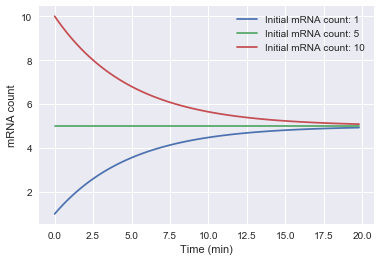

In [7]:
# Time increment in minutes
dt = 0.2

# mRNA production rate in min^-1
r = 1

# mRNA degradation rate in min^-1
gamma = 1/5

# Number of time steps
n_steps = 100

# Time points
times = np.arange(n_steps) * dt

# Different initial expected mRNA counts
mRNA_initial = [1, 5, 10]

for i in range(3):
    
    # mRNA count
    mRNA = np.zeros(n_steps)
    
    # Initialization
    mRNA[0] = mRNA_initial[i]
    
    for t in range(n_steps-1):
        mRNA[t+1] = mRNA[t] + r*dt - gamma*dt*mRNA[t]
        
    plt.plot(times, mRNA, label = 'Initial mRNA count: ' + str(mRNA_initial[i]))

plt.xlabel('Time (min)')
plt.ylabel('mRNA count')
plt.legend();

As we can see, regardless of our initial choice of the mRNA count, it converges to its steady state value of $r/\gamma$ in a timescale determied by the degradation rate ($t_{\mathrm{converge}} \sim 1/\gamma$).